In [1]:
import pandas as pd
import numpy as np
import os
import cv2 as cv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from skimage.transform import resize


def img_to_encoding(image):
    if image is None:
        return 0
    else:
        img = cv.resize(image,(160,160))
        #img = np.around(np.asarray(img)/255.0, decimals=12)
        #X = np.expand_dims(img, axis=0)
    return img

In [3]:
filepath = "gender_dataset_face/"

def load_image(filepath):
    
    labels = []
    temp = []
    for folder in os.listdir(filepath):
        label = folder
        for subfolder in os.listdir(filepath+folder):
            image_BGR = cv.imread(filepath + folder + "/" + subfolder)
            
            temp.append(img_to_encoding(image_BGR))
            if label == "woman":
                label1 = 1
            else:
                label1 = 0
        
            labels.append([label1])
    return temp,labels

In [4]:
os.listdir(filepath)

['man', 'woman']

In [5]:
data,labels = load_image(filepath)

In [6]:
labels[2301]

IndexError: list index out of range

In [7]:
print(len(labels),len(data))

118 118


In [7]:
data = np.array(data)

In [8]:
data[0]

array([[[ 21,  40,  61],
        [ 20,  40,  59],
        [ 19,  38,  56],
        ...,
        [190, 200, 206],
        [233, 241, 244],
        [248, 254, 255]],

       [[ 16,  35,  53],
        [ 14,  34,  52],
        [ 18,  37,  55],
        ...,
        [146, 156, 164],
        [205, 213, 219],
        [241, 247, 252]],

       [[ 11,  31,  48],
        [ 25,  45,  62],
        [ 27,  46,  63],
        ...,
        [107, 118, 125],
        [167, 176, 182],
        [231, 237, 243]],

       ...,

       [[253, 255, 255],
        [253, 255, 255],
        [254, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 255, 255],
        [253, 255, 255],
        [254, 255, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       [[252, 254, 254],
        [252, 254, 254],
        [254, 255, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]]

In [9]:
data = data/255

In [10]:
data

array([[[[0.08235294, 0.15686275, 0.23921569],
         [0.07843137, 0.15686275, 0.23137255],
         [0.0745098 , 0.14901961, 0.21960784],
         ...,
         [0.74509804, 0.78431373, 0.80784314],
         [0.91372549, 0.94509804, 0.95686275],
         [0.97254902, 0.99607843, 1.        ]],

        [[0.0627451 , 0.1372549 , 0.20784314],
         [0.05490196, 0.13333333, 0.20392157],
         [0.07058824, 0.14509804, 0.21568627],
         ...,
         [0.57254902, 0.61176471, 0.64313725],
         [0.80392157, 0.83529412, 0.85882353],
         [0.94509804, 0.96862745, 0.98823529]],

        [[0.04313725, 0.12156863, 0.18823529],
         [0.09803922, 0.17647059, 0.24313725],
         [0.10588235, 0.18039216, 0.24705882],
         ...,
         [0.41960784, 0.4627451 , 0.49019608],
         [0.65490196, 0.69019608, 0.71372549],
         [0.90588235, 0.92941176, 0.95294118]],

        ...,

        [[0.99215686, 1.        , 1.        ],
         [0.99215686, 1.        , 1.        ]

In [9]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.3,
                                                  random_state=42)

In [10]:
trainY = np.asarray(trainY).reshape(-1,)
testY = np.asarray(testY).reshape(-1,)

In [11]:
trainX.shape

(82, 160, 160, 3)

In [12]:
import tensorflow as tf
from tensorflow.keras import layers,regularizers

In [13]:
#convolutional model

cnn = tf.keras.models.Sequential([

      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',strides=(1,1),padding='valid',input_shape=(160,160,3)),
      layers.MaxPool2D((2,2)),
      layers.BatchNormalization(axis=3),
      layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',strides=(1,1),padding='valid'),
      layers.MaxPool2D((2,2)),
      layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',strides=(1,1),padding='valid'),
      layers.MaxPool2D((2,2)),
      layers.Dropout(0.5),
      layers.Flatten(),
      layers.Dense(200,activation='relu'),
      layers.Dense(120,activation='relu'),
      layers.Dense(1,activation='sigmoid')
])

C:\Users\Mekin\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#optimazation

cnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 79, 79, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │    16,589,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        24,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,984,313 (64.79 MB)

 Trainable params: 16,984,185 (64.79 MB)

 Non-trainable params: 128 (512.00 B)

In [16]:
cnn.fit(trainX,trainY,epochs=15)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6888 - loss: 2.6804
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8809 - loss: 1.1667
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8926 - loss: 0.3883   
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9161 - loss: 0.3403   
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 893ms/step - accuracy: 0.9278 - loss: 0.3197
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 859ms/step - accuracy: 0.8926 - loss: 0.2505
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9004 - loss: 0.1832   
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8809 - loss: 0.1697
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 925ms/step - accuracy: 0.9600 - loss: 0.1347
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 881ms/step - accuracy: 0.9822 - loss: 0.0834
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 959ms/step - accuracy: 1.0000 - loss: 0.0381
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 991ms/step - accuracy: 0.9405 - loss: 0.07

In [17]:
cnn.evaluate(testX,testY)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8843 - loss: 3.2308


[3.1015331745147705, 0.8888888955116272]

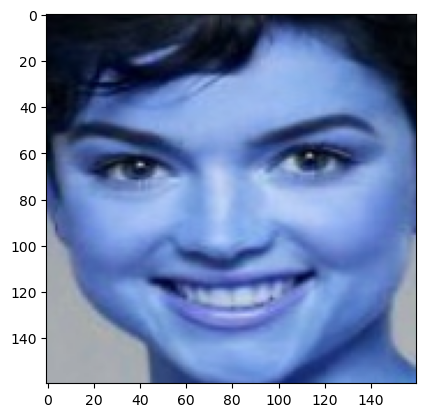

In [18]:
plt.imshow(testX[0])

In [19]:
y_pred = cnn.predict(testX)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step  


In [20]:
predY = []
for i in y_pred:
    if i[0] > 0.5:
        predY.append(1)
    else:
        predY.append(0)

In [21]:
predY = np.array(predY)

In [21]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(testY,predY))

ValueError: Found input variables with inconsistent numbers of samples: [36, 0]

In [22]:
accuracy_score(testY,predY)

NameError: name 'accuracy_score' is not defined

In [23]:
# save the model to disk
cnn.save('gender_classification1.h5')

In [57]:
testY

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [58]:
predY

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,